# Proyek Pertama: Menyelesaikan Permasalahan Human Resources

- Nama: Nida'an Khafiyya
- Email: nidaankhafiyyaakun@gmail.com
- Id Dicoding: needkh

## Persiapan

### Menyiapkan library yang dibutuhkan

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import xgboost as xgb
import joblib

from scipy.stats import chi2_contingency, pearsonr
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from scipy.stats import f_oneway
from imblearn.over_sampling import RandomOverSampler

from google.colab import userdata
from sqlalchemy import create_engine

### Menyiapkan data yang akan diguankan

In [ ]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv",
    encoding='windows-1252'
    )

df.head(5)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Understanding

In [ ]:
# Menampilkan kolom yang ada pada dataset
df.columns

Index(['EmployeeId', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [ ]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [ ]:
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Data Preparation/Preprocessing

### Missing Values dan Duplicate

In [ ]:
df.isna().sum()

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


In [ ]:
# drop missing value
df.dropna(inplace=True)

In [ ]:
# cek duplikasi data
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1058 non-null   int64  
 1   Age                       1058 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1058 non-null   object 
 4   DailyRate                 1058 non-null   int64  
 5   Department                1058 non-null   object 
 6   DistanceFromHome          1058 non-null   int64  
 7   Education                 1058 non-null   int64  
 8   EducationField            1058 non-null   object 
 9   EmployeeCount             1058 non-null   int64  
 10  EnvironmentSatisfaction   1058 non-null   int64  
 11  Gender                    1058 non-null   object 
 12  HourlyRate                1058 non-null   int64  
 13  JobInvolvement            1058 non-null   int64  
 14  JobLevel     

In [ ]:
# Mengecek pembagian data target
df['Attrition'].value_counts()

,count
Attrition,
0.0,879
1.0,179


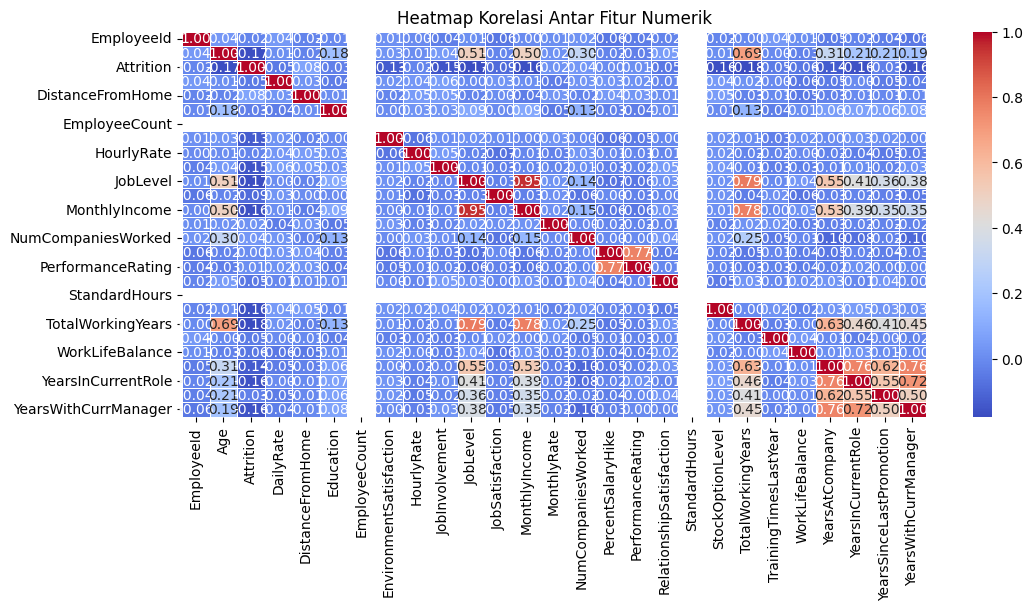

In [ ]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

#Headmap korelasi antar fitur numerik
plt.figure(figsize=(12, 5))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur Numerik")
plt.show()

Heatmap khusus untuk kolom Attrition untuk mengetahui fitur numberik mana yang mempengaruhi

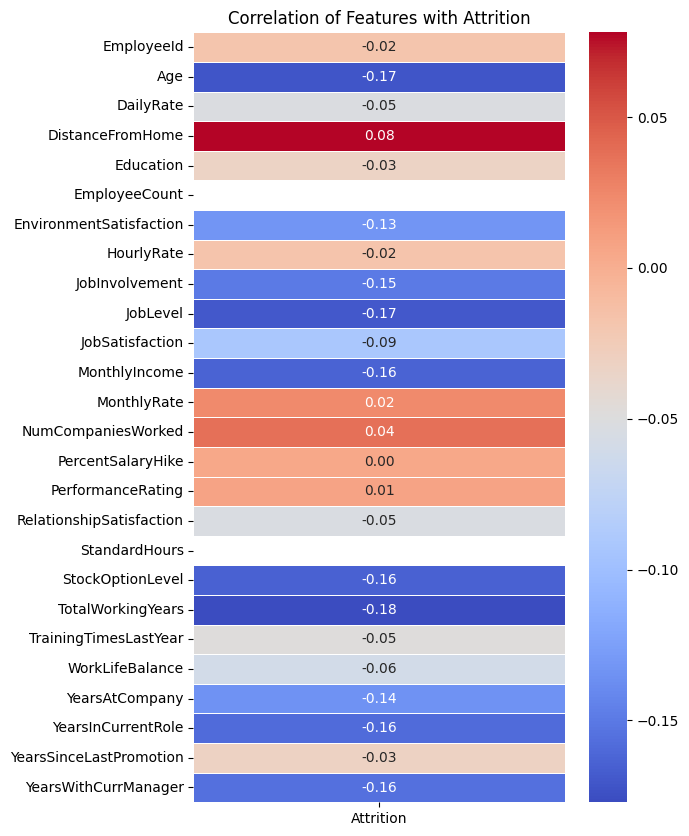

In [ ]:
# Ambil fitur numerik
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Compute correlation matrix for the selected numeric features
correlation_matrix = df[numeric_features].corr()

# Extract correlation of all features with 'Attrition'
attrition_corr = correlation_matrix[['Attrition']].drop('Attrition')
# attrition_corr = correlation_matrix[['Attrition']] # Keep Attrition if it's the only column

# Plot heatmap
plt.figure(figsize=(6, 10))
sns.heatmap(attrition_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)

plt.title('Correlation of Features with Attrition')
plt.show()

Pengecekan khusus untuk kolom Attrition untuk mengetahui fitur category mana yang mempengaruhi dengan menggunakan F-staristic dan p-value

In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

anova_results = {}

for col in categorical_features:
    groups = [df[df[col] == val]['Attrition'].dropna() for val in df[col].dropna().unique()]
    if len(groups) > 1:
        try:
            f_stat, p_val = f_oneway(*groups)
            anova_results[col] = {'F-statistic': f_stat, 'p-value': p_val}
        except Exception as e:
            anova_results[col] = {'error': str(e)}

anova_df = pd.DataFrame(anova_results).T.sort_values('p-value')
print(anova_df)

                F-statistic       p-value
OverTime          73.970314  2.828069e-17
JobRole            8.779605  1.131483e-11
MaritalStatus     19.449081  5.074128e-09
BusinessTravel     6.768417  1.200086e-03
EducationField     1.969441  8.063917e-02
Department         2.317216  9.904897e-02
Gender             0.266607  6.057248e-01


Pengecekan khusus untuk kolom Attrition untuk mengetahui fitur numberik dan category mana yang mempengaruhi dengan menggunakan MI Score

In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

X = df.drop(columns='Attrition')
y = LabelEncoder().fit_transform(df['Attrition'])

X_encoded = X.apply(LabelEncoder().fit_transform)
mi_scores = mutual_info_classif(X_encoded, y)

mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores}).sort_values(by='MI Score', ascending=False)
print(mi_df)

                     Feature  MI Score
14                   JobRole  0.033204
21                  OverTime  0.032614
13                  JobLevel  0.031304
29           WorkLifeBalance  0.031166
1                        Age  0.029201
31        YearsInCurrentRole  0.028185
12            JobInvolvement  0.026500
26          StockOptionLevel  0.017973
27         TotalWorkingYears  0.016556
33      YearsWithCurrManager  0.015706
25             StandardHours  0.015579
30            YearsAtCompany  0.015312
18               MonthlyRate  0.014133
17             MonthlyIncome  0.010107
10                    Gender  0.008031
7             EducationField  0.007851
2             BusinessTravel  0.006616
28     TrainingTimesLastYear  0.004633
9    EnvironmentSatisfaction  0.004454
16             MaritalStatus  0.002451
8              EmployeeCount  0.001535
0                 EmployeeId  0.000000
5           DistanceFromHome  0.000000
4                 Department  0.000000
3                  DailyR

Menetapkan fitur penting numerical dan categorical dan menggabungkannya kedalam satu dataframe

In [ ]:
# Define important features based on analysis
important_categorical = ['OverTime', 'BusinessTravel', 'JobRole']
important_numerical = ['Age', 'JobLevel', 'TotalWorkingYears', 'YearsAtCompany','YearsWithCurrManager',
                      'YearsInCurrentRole', 'JobInvolvement', 'MonthlyIncome']

selected_features_df = df[important_categorical + important_numerical + ['Attrition']]

In [ ]:
# Melampirkan data yang ada dalam fitur categorical
for col in important_categorical:
    print(selected_features_df[col].value_counts())

OverTime
No     751
Yes    307
Name: count, dtype: int64
BusinessTravel
Travel_Rarely        746
Travel_Frequently    205
Non-Travel           107
Name: count, dtype: int64
JobRole
Sales Executive              232
Research Scientist           214
Laboratory Technician        188
Manufacturing Director       107
Healthcare Representative     88
Manager                       79
Research Director             62
Sales Representative          58
Human Resources               30
Name: count, dtype: int64


### Encoding Categorical

In [ ]:
# Tentukan kolom kategorikal yang ingin di-encode
categorical_cols = ['OverTime', 'BusinessTravel', 'JobRole']

# Lakukan One-Hot Encoding
encoder = OneHotEncoder(drop='first', dtype=int, sparse_output=False, handle_unknown='ignore')
encoded_cats = encoder.fit_transform(selected_features_df[categorical_cols])
encoded_cat_cols = encoder.get_feature_names_out(categorical_cols)

# Buat DataFrame hasil encoding
encoded_df = pd.DataFrame(encoded_cats, columns=encoded_cat_cols, index=selected_features_df.index)

# Gabungkan fitur numerik + hasil encoding + target
numerical_cols = selected_features_df.drop(columns=categorical_cols + ['Attrition']).columns
selected_features_df_final = pd.concat([
    selected_features_df[numerical_cols],
    encoded_df,
    selected_features_df['Attrition']
], axis=1)

### Outliers

Mengecek outliers dengan boxplot, namun terlihat bahwa dataset memang sudah minim outliers

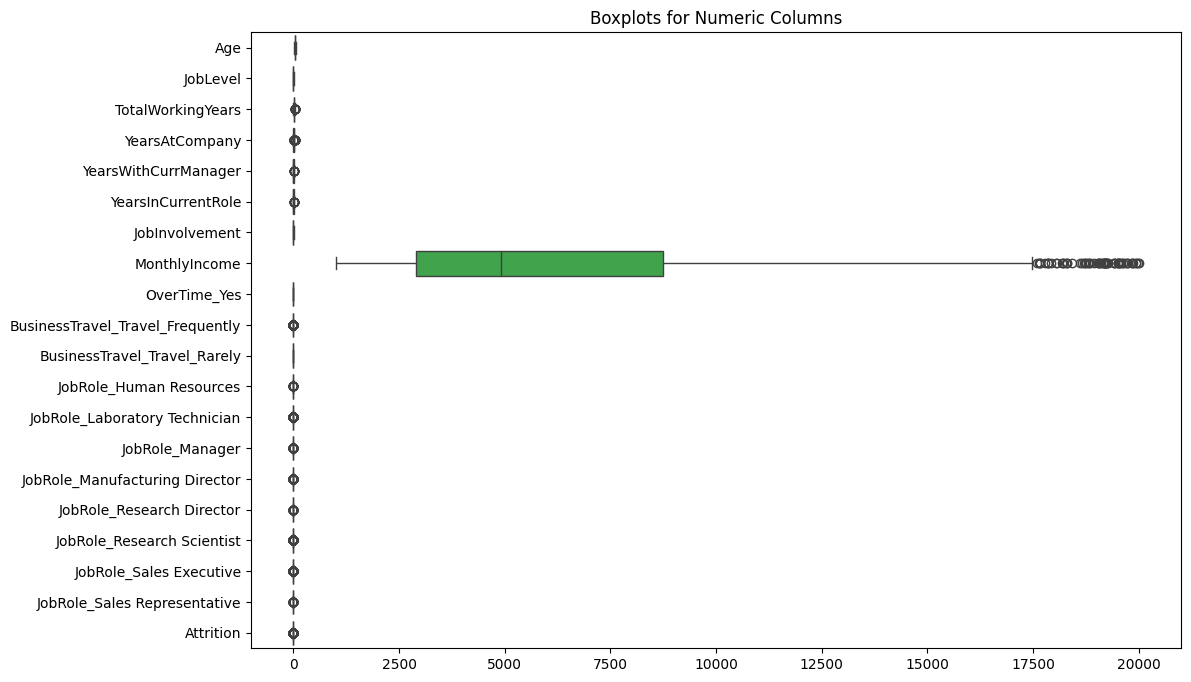

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=selected_features_df_final.select_dtypes(include=np.number), orient='h')
plt.title("Boxplots for Numeric Columns")
plt.show()

## Exploratory Data Analysis (EDA)

In [ ]:
selected_features_df.describe(include='all')

,OverTime,BusinessTravel,JobRole,Age,JobLevel,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager,YearsInCurrentRole,JobInvolvement,MonthlyIncome,Attrition
count,1058,1058,1058,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.00000,1058.000000,1058.000000
unique,2,3,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,No,Travel_Rarely,Sales Executive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,751,746,232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,37.055766,2.090737,11.435728,7.065217,4.142722,4.26087,2.73724,6625.945180,0.169187
std,NaN,NaN,NaN,9.410421,1.136514,8.016429,6.265227,3.599044,3.61747,0.70473,4837.695042,0.375094
min,NaN,NaN,NaN,18.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.00000,1009.000000,0.000000
25%,NaN,NaN,NaN,30.000000,1.000000,6.000000,3.000000,2.000000,2.00000,2.00000,2900.250000,0.000000
50%,NaN,NaN,NaN,36.000000,2.000000,10.000000,5.000000,3.000000,3.00000,3.00000,4903.500000,0.000000
75%,NaN,NaN,NaN,43.000000,3.000000,16.000000,9.000000,7.000000,7.00000,3.00000,8736.500000,0.000000


In [ ]:
selected_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OverTime              1058 non-null   object 
 1   BusinessTravel        1058 non-null   object 
 2   JobRole               1058 non-null   object 
 3   Age                   1058 non-null   int64  
 4   JobLevel              1058 non-null   int64  
 5   TotalWorkingYears     1058 non-null   int64  
 6   YearsAtCompany        1058 non-null   int64  
 7   YearsWithCurrManager  1058 non-null   int64  
 8   YearsInCurrentRole    1058 non-null   int64  
 9   JobInvolvement        1058 non-null   int64  
 10  MonthlyIncome         1058 non-null   int64  
 11  Attrition             1058 non-null   float64
dtypes: float64(1), int64(8), object(3)
memory usage: 107.5+ KB


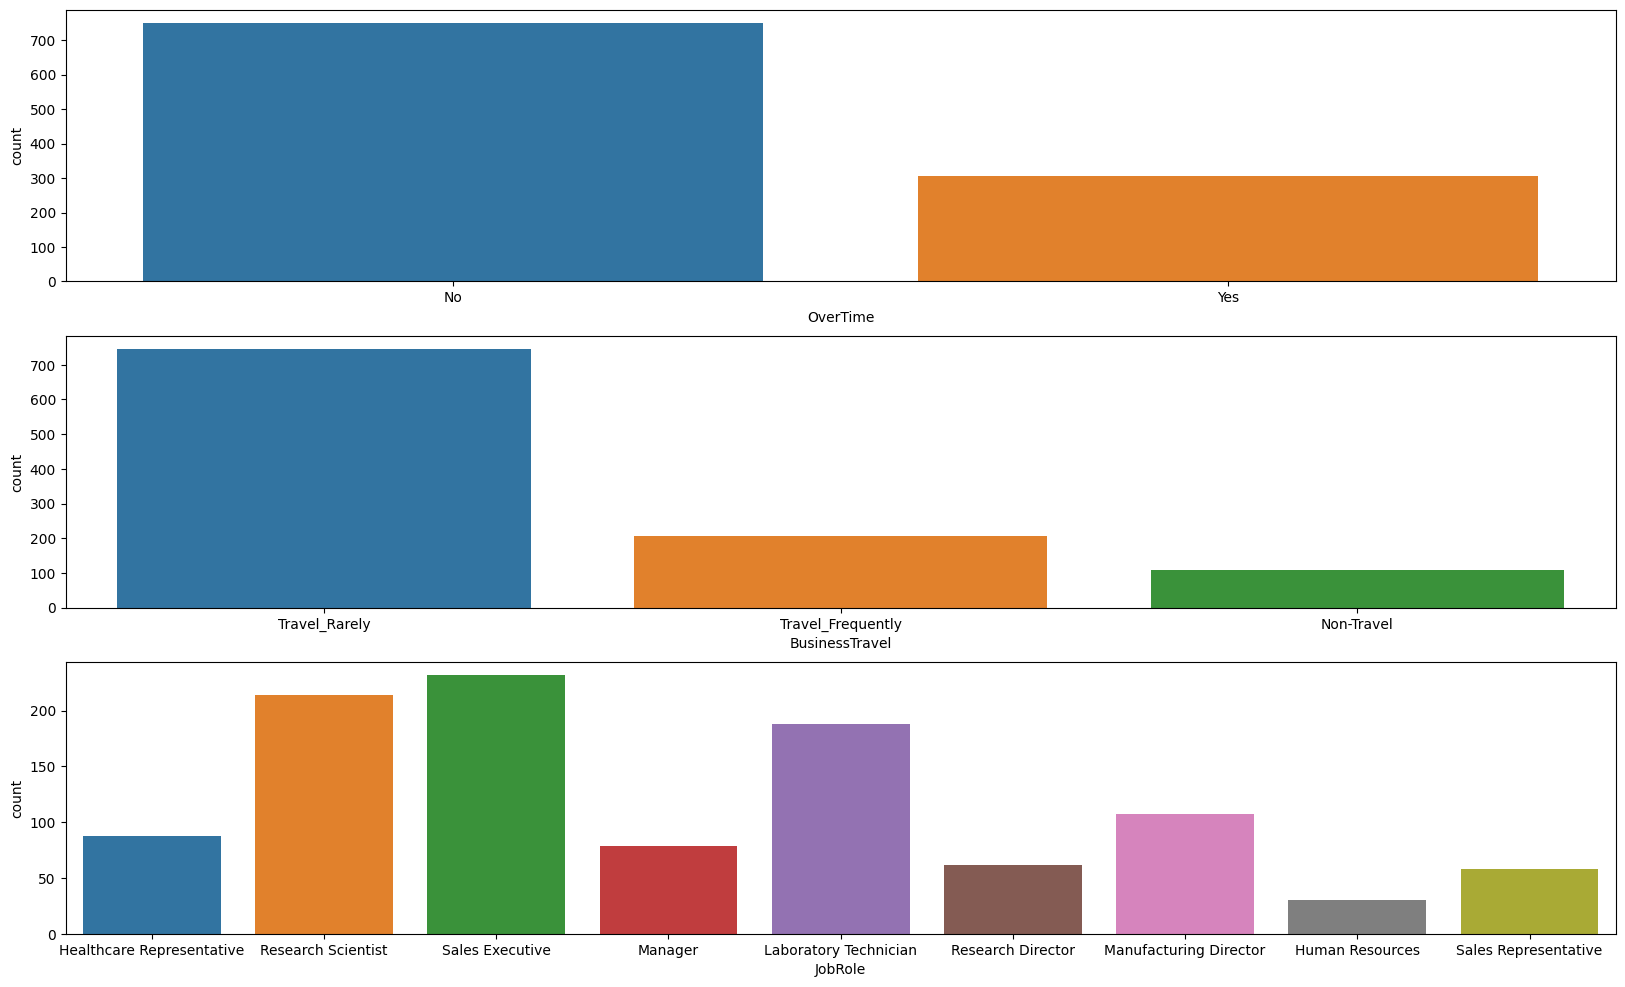

In [ ]:
# Menampilkan distribusi fitur categorical
categorical = ['OverTime', 'BusinessTravel', 'JobRole']

fig, ax = plt.subplots(len(categorical), 1,figsize=(20,12))
for i, feature in enumerate(categorical):
  sns.countplot(data=selected_features_df, x=feature, hue=feature, ax=ax[i])
plt.show()

In [ ]:
# Fungsi categorical_plot membuat serangkaian countplot untuk setiap fitur kategorikal yang diberikan
def categorical_plot(features, df, segment_feature=None):
    fig, ax = plt.subplots(len(features), 1,figsize=(8,15))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.countplot(data=df, x=segment_feature, hue=feature, ax=ax[i])
        else:
            sns.countplot(data=df, x=feature, ax=ax[i])
    plt.tight_layout()
    plt.show()

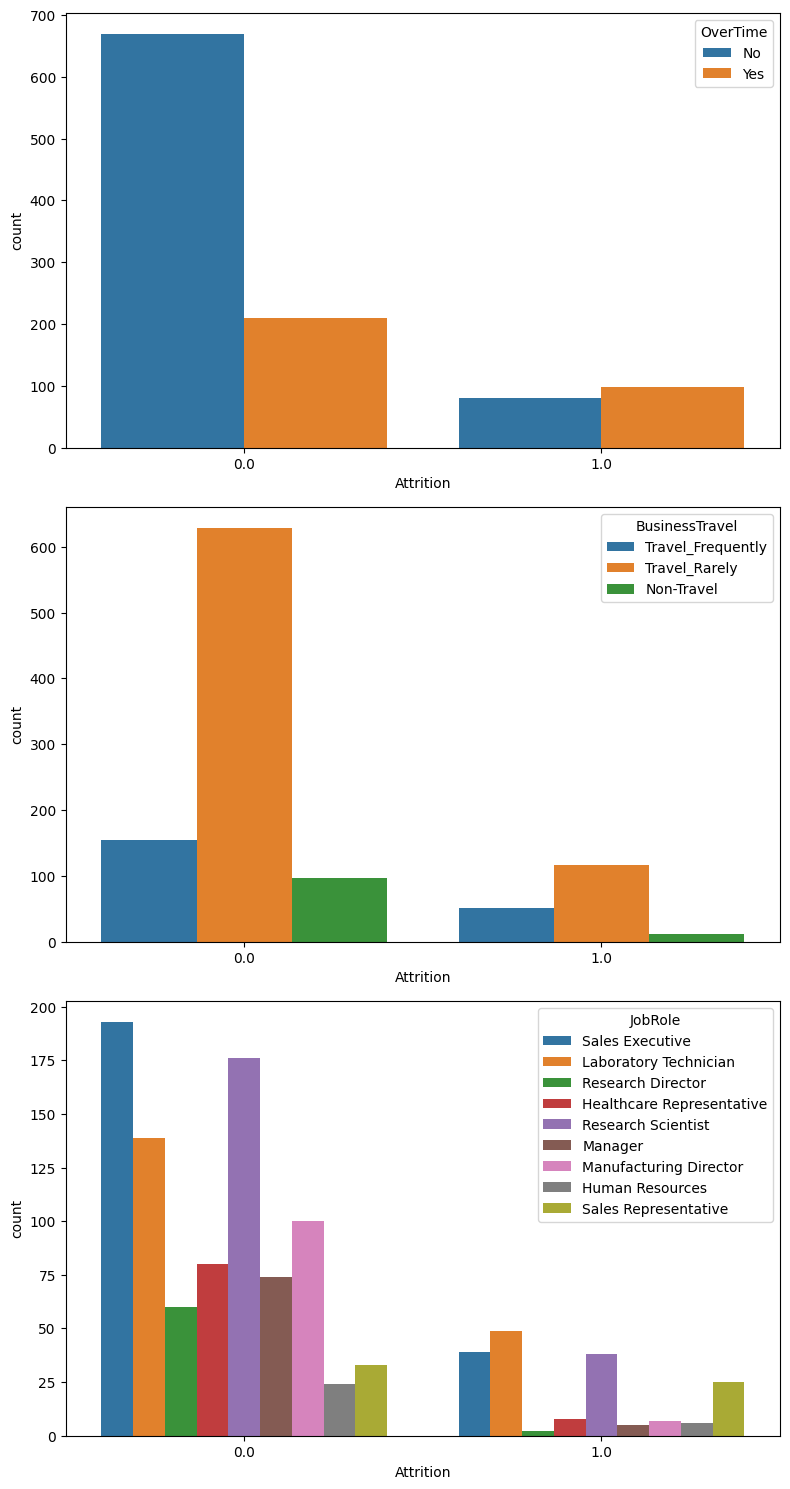

In [ ]:
categorical_plot(
    features=['OverTime', 'BusinessTravel', 'JobRole'],
    df=selected_features_df,
    segment_feature="Attrition"
)

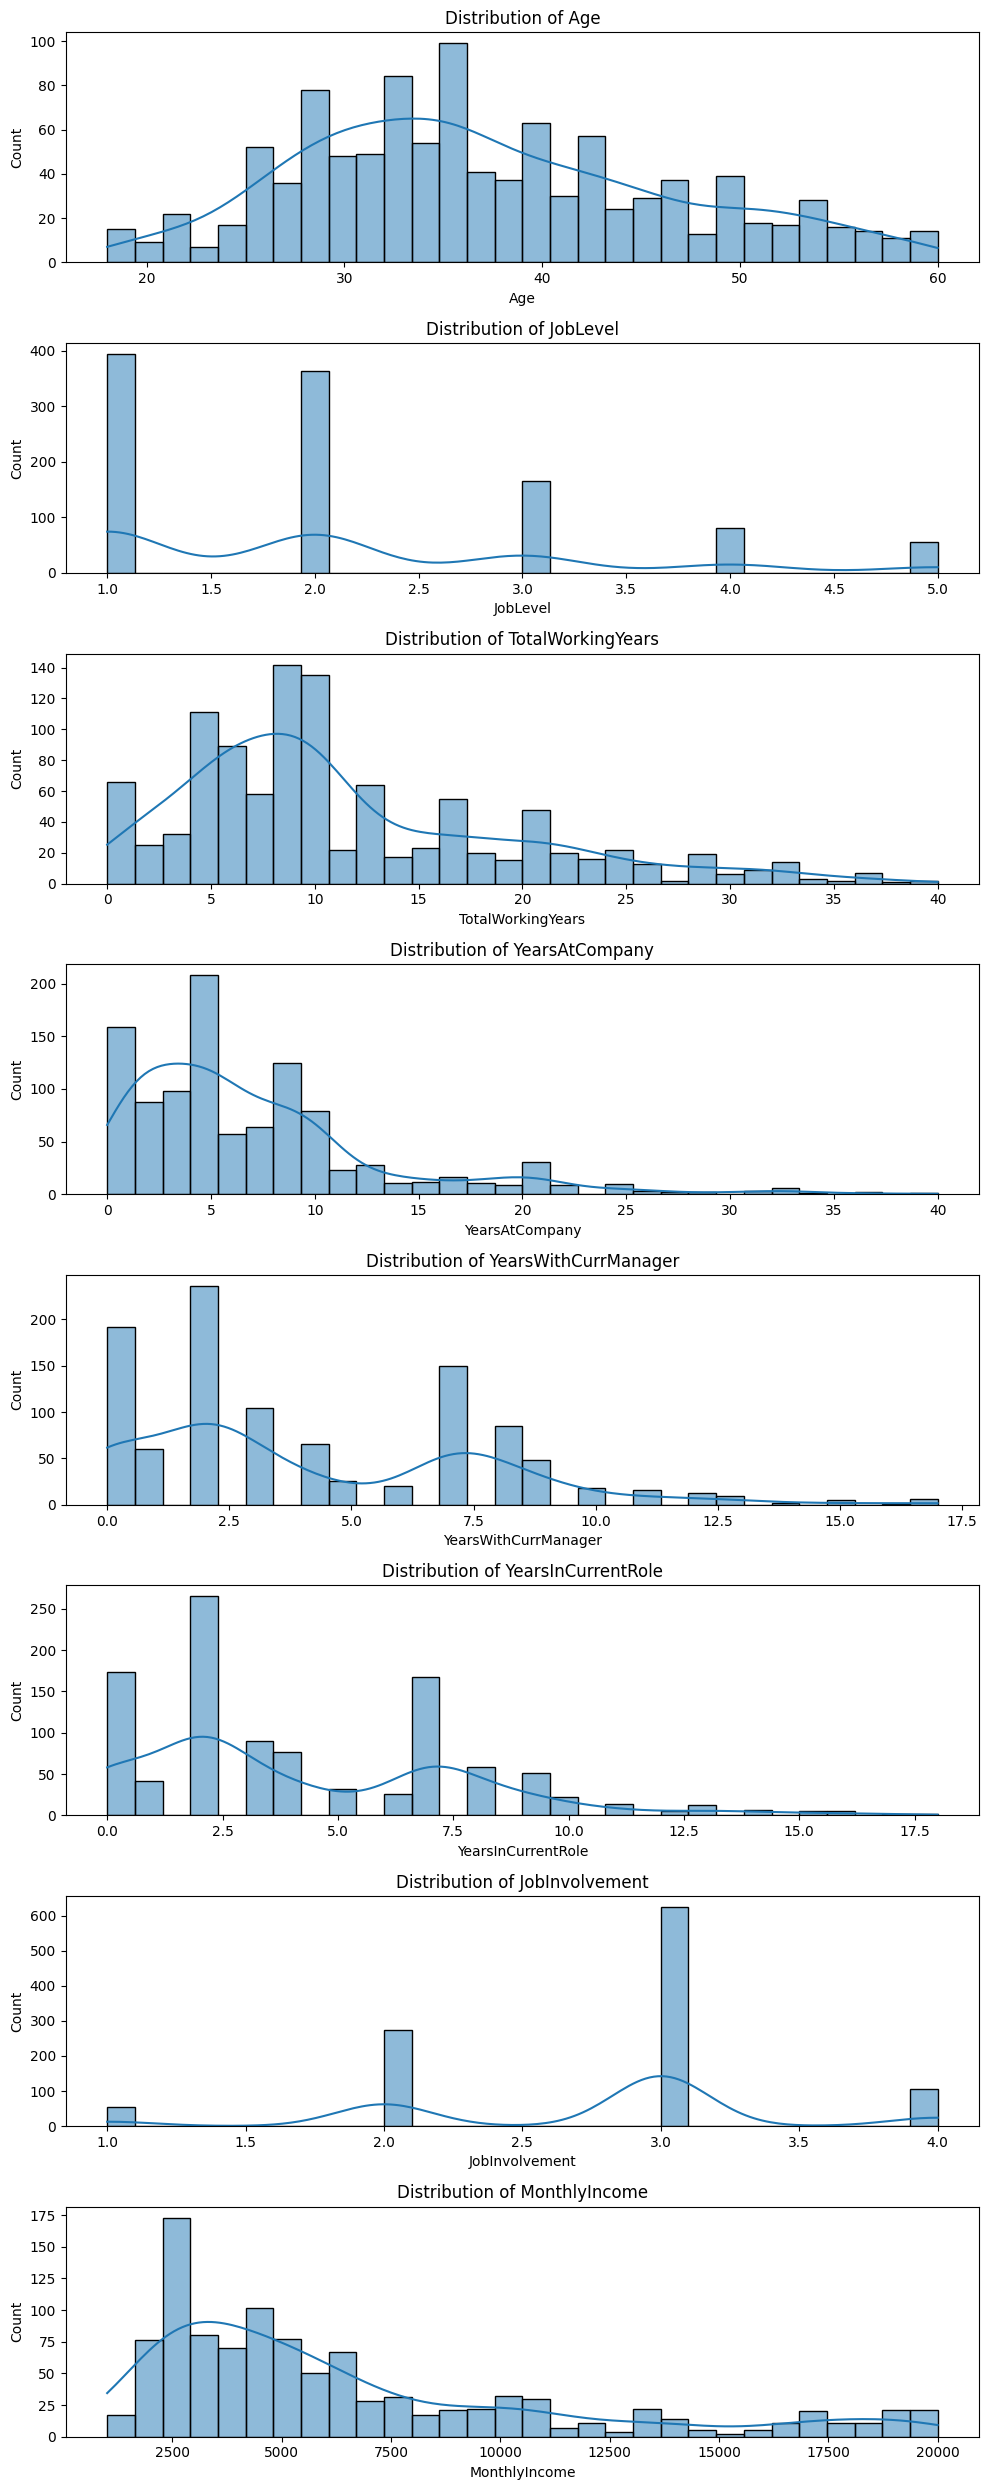

In [ ]:
# Menampilkan Distribusi fitur numberik
numerical = [
    'Age',
    'JobLevel',
    'TotalWorkingYears',
    'YearsAtCompany',
    'YearsWithCurrManager',
    'YearsInCurrentRole',
    'JobInvolvement',
    'MonthlyIncome'
]

def plot_numeric_distribution(features, df):
    fig, ax = plt.subplots(len(features), 1, figsize=(10, 25))
    for i, feature in enumerate(features):
        sns.histplot(df[feature], kde=True, ax=ax[i], bins=30)
        ax[i].set_title(f'Distribution of {feature}')
    plt.tight_layout()
    plt.show()

plot_numeric_distribution(numerical, selected_features_df)

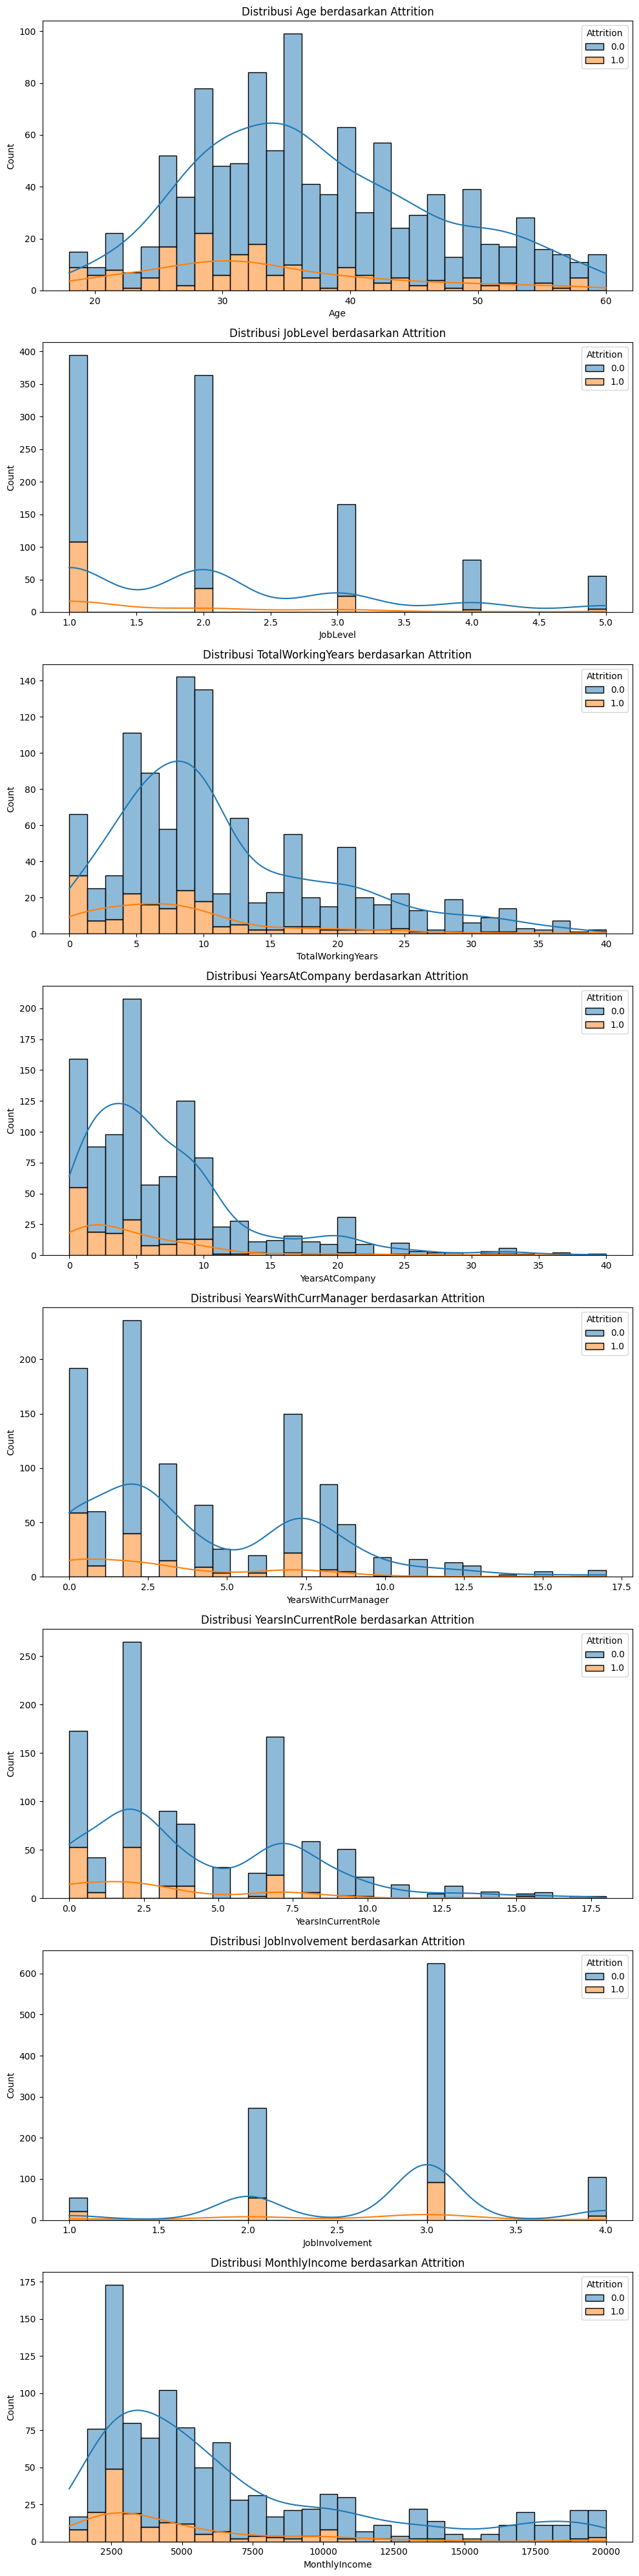

In [ ]:
# Menampilkan distribusi fitur numberik berdasarkan Attrition
def plot_numeric_distribution_by_attrition(features, df, label_col='Attrition'):
    fig, axes = plt.subplots(len(features), 1, figsize=(10, 5 * len(features)))
    if len(features) == 1:
        axes = [axes]  # agar iterable jika hanya satu fitur

    for i, feature in enumerate(features):
        sns.histplot(data=df, x=feature, hue=label_col, kde=True, multiple='stack', ax=axes[i], bins=30)
        axes[i].set_title(f'Distribusi {feature} berdasarkan {label_col}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

plot_numeric_distribution_by_attrition(numerical, selected_features_df)

## Modeling

### Oversampling Class Distribution

In [ ]:
X = pd.get_dummies(selected_features_df_final.drop('Attrition', axis=1), drop_first=True)
y = selected_features_df_final['Attrition']

In [ ]:
# Check class distribution
print("Class distribution in training set:")
print(y.value_counts(normalize=True))

Class distribution in training set:
Attrition
0.0    0.830813
1.0    0.169187
Name: proportion, dtype: float64


In [ ]:
# RandomOverSampler untuk menyamakan distribusi 1 dan 0
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
print("Class distribution after oversampling:")
print(y_resampled.value_counts(normalize=True))

Class distribution after oversampling:
Attrition
1.0    0.5
0.0    0.5
Name: proportion, dtype: float64


### Split Dataset

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42, stratify=y_resampled)

# Scale numerical features
scaler = StandardScaler()
numerical_features = [col for col in X_resampled.columns if any(num_feat in col for num_feat in important_numerical)]
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numerical_features] = scaler.fit_transform(X_train_scaled[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test_scaled[numerical_features])

### Hyperparameter tuning model dan training

In [ ]:
# Hyperparameter tuning model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Parameter grid untuk model Random Forest
param_grids = {
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [50, 100, 150],
            "max_depth": [None, 10, 20, 30],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
        },
    }
}

# Dictionary untuk menyimpan model terbaik
best_models = {}

print("🔧 Starting GridSearchCV...\n")

# Melakukan tuning dengan GridSearchCV
for name, cfg in param_grids.items():
    print(f"Tuning: {name}")

    grid_search = GridSearchCV(
        estimator=cfg["model"],
        param_grid=cfg["params"],
        cv=5,
        scoring="f1_weighted",
        n_jobs=-1
    )

    grid_search.fit(X_train_scaled, y_train)
    best_models[name] = grid_search.best_estimator_

    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best F1 Score (CV): {grid_search.best_score_:.4f}\n")

🔧 Starting GridSearchCV...

Tuning: Random Forest
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best F1 Score (CV): 0.9377



In [ ]:
rf = RandomForestClassifier(
    n_estimators=150,
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=1
)

rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
y_prob = rf.predict_proba(X_test_scaled)[:, 1]

## Evaluation

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Random Forest Model Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Random Forest Model Results:
Accuracy: 0.9341
ROC AUC: 0.9943

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.88      0.93       220
         1.0       0.89      0.99      0.94       220

    accuracy                           0.93       440
   macro avg       0.94      0.93      0.93       440
weighted avg       0.94      0.93      0.93       440



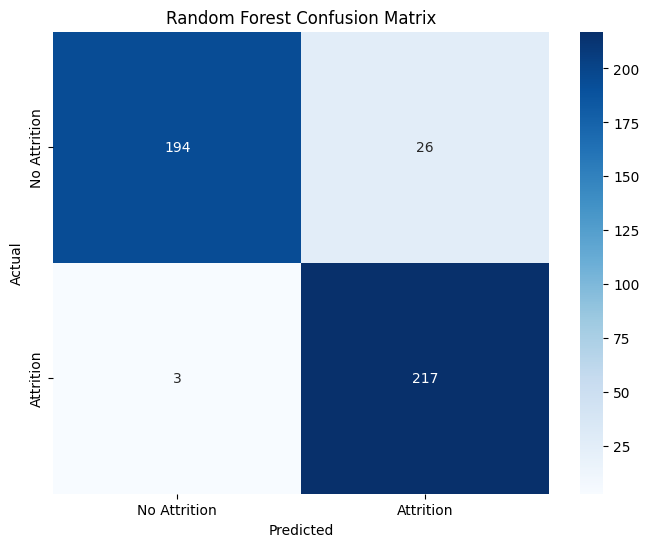

In [ ]:
# Menampilkan Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

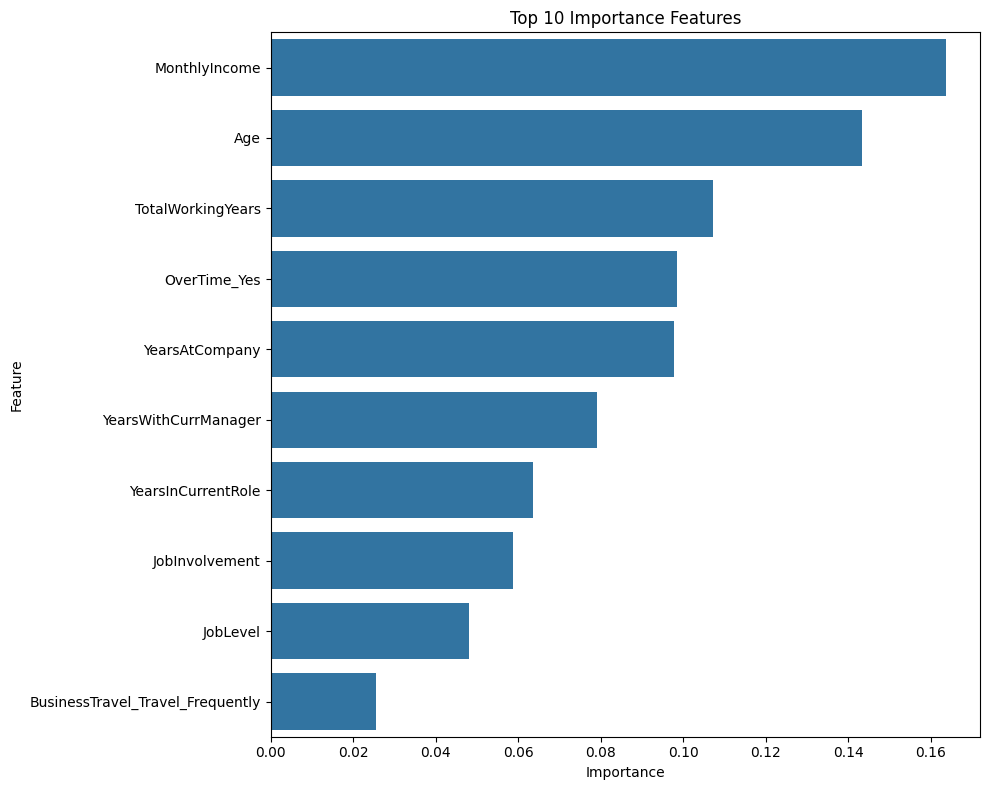

In [ ]:
# Menampilkan barplot Top 10 Importance Features
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Importance Features')
plt.tight_layout()
plt.show()

In [ ]:
# Menampilkan peringkat importance features
rank_features = feature_importance.head(20)
print("Ranking by most important features:")
print(rank_features)

Ranking by most important features:
                             Feature  Importance
7                      MonthlyIncome    0.163744
0                                Age    0.143272
2                  TotalWorkingYears    0.107331
8                       OverTime_Yes    0.098452
3                     YearsAtCompany    0.097708
4               YearsWithCurrManager    0.078987
5                 YearsInCurrentRole    0.063543
6                     JobInvolvement    0.058672
1                           JobLevel    0.048006
9   BusinessTravel_Travel_Frequently    0.025456
17           JobRole_Sales Executive    0.021012
10      BusinessTravel_Travel_Rarely    0.020253
16        JobRole_Research Scientist    0.017543
12     JobRole_Laboratory Technician    0.014730
14    JobRole_Manufacturing Director    0.013477
18      JobRole_Sales Representative    0.012174
15         JobRole_Research Director    0.005994
13                   JobRole_Manager    0.005134
11           JobRole_Human Resour

In [ ]:
feature_importance.to_csv('importance_feature.csv', index=False)

## Save Model

Save model dan endocer

In [ ]:
joblib.dump(rf, 'rf_model.pkl')

['rf_model.pkl']

In [ ]:
joblib.dump(encoder, 'onehot_encoder.pkl')

['onehot_encoder.pkl']

## Test Model

In [ ]:
# Menyiapkan dataframe untuk test model
predict_df = selected_features_df[selected_features_df['Attrition'] != 1]
predict_df

,OverTime,BusinessTravel,JobRole,Age,JobLevel,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager,YearsInCurrentRole,JobInvolvement,MonthlyIncome,Attrition
3,No,Travel_Frequently,Sales Executive,42,4,23,20,8,4,3,13525,0.0
6,Yes,Travel_Rarely,Sales Executive,40,2,6,4,2,3,1,7457,0.0
8,No,Travel_Frequently,Laboratory Technician,36,1,8,8,7,1,3,2153,0.0
9,No,Travel_Rarely,Research Director,32,3,10,7,7,7,3,11159,0.0
10,No,Travel_Rarely,Sales Executive,25,2,5,5,3,2,2,4256,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1460,No,Non-Travel,Manager,48,4,27,5,1,4,4,16885,0.0
1461,No,Travel_Rarely,Research Scientist,44,1,6,5,3,2,3,3420,0.0
1463,No,Travel_Rarely,Sales Executive,53,2,18,14,10,7,3,8381,0.0
1465,Yes,Travel_Rarely,Manufacturing Director,38,3,10,1,0,0,3,7861,0.0


In [ ]:
import pandas as pd
import pickle
import joblib

def encode_input(df, encoder, important_categorical, important_numerical):
    # Encode fitur kategorikal
    X_cat = encoder.transform(df[important_categorical])
    cat_cols = encoder.get_feature_names_out(important_categorical)

    # Fitur numerik
    X_num = df[important_numerical].reset_index(drop=True)

    # Gabungkan
    X_ready = pd.concat([X_num, pd.DataFrame(X_cat, columns=cat_cols, index=X_num.index)], axis=1)
    return X_ready

def predict_and_save():
    # === Load model & encoder ===
    with open("rf_model.pkl", "rb") as file:
        model = joblib.load(file)

    encoder = joblib.load("onehot_encoder.pkl")

    # === Load dataset tanpa kolom target ===
    df = predict_df

    if "Attrition" in df.columns:
        actual_attrition = df["Attrition"].copy()
        df = df.drop(columns=["Attrition"])
    else:
        actual_attrition = None

    important_categorical = ['OverTime', 'BusinessTravel', 'JobRole']
    important_numerical = ['Age', 'JobLevel', 'TotalWorkingYears', 'YearsAtCompany',
                          'YearsWithCurrManager', 'YearsInCurrentRole', 'JobInvolvement', 'MonthlyIncome']

    X_ready = encode_input(df, encoder, important_categorical, important_numerical)

    # === Predict ===
    prediction = model.predict(X_ready)
    proba = model.predict_proba(X_ready)

    # === Cetak salah satu hasil prediksi ===
    index = 3
    print("Hasil Prediksi untuk Baris ke-3:")
    print(df.iloc[index])

    if prediction[index] == 1:
        print(f"\nPrediksi: Karyawan akan keluar (Attrition = 1), kemungkinan: {proba[index][1]:.2%}")
    else:
        print(f"\nPrediksi: Karyawan tidak akan keluar (Attrition = 0), kemungkinan keluar: {proba[index][0]:.2%}")

    # === Simpan hasil ke dataframe ===
    df["Attrition (Actual)"] = actual_attrition if actual_attrition is not None else "-"
    df["PredictedAttrition"] = prediction
    df["Probability"] = [round(p[1], 4) for p in proba]  # Probabilitas keluar (Attrition=1)

    # === Simpan hasil ke file baru ===
    df.to_csv("hasil_prediksi.csv", index=False)
    print("\nHasil prediksi lengkap disimpan sebagai 'hasil_prediksi.csv'")
    df.head()

if __name__ == "__main__":
    predict_and_save()

Hasil Prediksi untuk Baris ke-3:
OverTime                               No
BusinessTravel              Travel_Rarely
JobRole                 Research Director
Age                                    32
JobLevel                                3
TotalWorkingYears                      10
YearsAtCompany                          7
YearsWithCurrManager                    7
YearsInCurrentRole                      7
JobInvolvement                          3
MonthlyIncome                       11159
Name: 9, dtype: object

Prediksi: Karyawan tidak akan keluar (Attrition = 0), kemungkinan keluar: 50.00%

Hasil prediksi lengkap disimpan sebagai 'hasil_prediksi.csv'


In [ ]:
pd.read_csv('hasil_prediksi.csv')

,OverTime,BusinessTravel,JobRole,Age,JobLevel,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager,YearsInCurrentRole,JobInvolvement,MonthlyIncome,Attrition (Actual),PredictedAttrition,Probability
0,No,Travel_Frequently,Sales Executive,42,4,23,20,8,4,3,13525,0.0,0.0,0.3733
1,Yes,Travel_Rarely,Sales Executive,40,2,6,4,2,3,1,7457,0.0,0.0,0.4667
2,No,Travel_Frequently,Laboratory Technician,36,1,8,8,7,1,3,2153,0.0,0.0,0.4200
3,No,Travel_Rarely,Research Director,32,3,10,7,7,7,3,11159,0.0,0.0,0.5000
4,No,Travel_Rarely,Sales Executive,25,2,5,5,3,2,2,4256,0.0,0.0,0.4200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,No,Non-Travel,Manager,48,4,27,5,1,4,4,16885,0.0,0.0,0.4333
875,No,Travel_Rarely,Research Scientist,44,1,6,5,3,2,3,3420,0.0,1.0,0.5400
876,No,Travel_Rarely,Sales Executive,53,2,18,14,10,7,3,8381,0.0,0.0,0.4267
877,Yes,Travel_Rarely,Manufacturing Director,38,3,10,1,0,0,3,7861,0.0,0.0,0.4333


simpan requirements.txt

In [ ]:
!pip freeze > requirements.txt